In [1]:
import pyclesperanto_prototype as cle
from dask.threaded import get as dask_get
from skimage.io import imread
import warnings
import inspect
from skimage.measure import label


cle.get_device()

<gfx90c on Platform: AMD Accelerated Parallel Processing (2 refs)>

In [11]:
class Workflow():
    
    def __init__(self):
        self.tasks = {}
   

    def set(self, name, func_or_data, *args, **kwargs):
        if name in self.tasks.keys():
            warnings.warn("Overwriting {}".format(name))
        if not callable(func_or_data):
            self.tasks[name] = func_or_data
            return
        
        sig = inspect.signature(func_or_data)
        bound = sig.bind(*args, **kwargs)
        bound.apply_defaults()
        
        self.tasks[name] = tuple([func_or_data] + [value for key, value in bound.arguments.items()]
                                )        

    def get(self, name):
        ## Actually, all this should work with dask. But I don't manage.
        return dask_get(self.tasks, name)

w = Workflow()
# define background subtraction
w.set("background_subtracted", cle.top_hat_box, "input", radius_x=10, radius_y=10)
# define segmentation
w.set("binarized", cle.threshold_otsu, "background_subtracted")

# add a function from another library
w.set("alias", label, "binarized")

# link an alias
w.set("segmented", "alias")

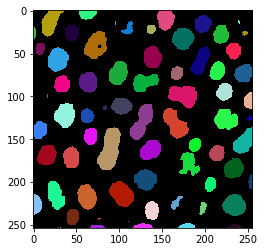

In [8]:
w.set("input", imread("C:/structure/data/blobs.tif"))
result = w.get("segmented")

cle.imshow(result, labels=True)

C:\Users\rober\AppData\Local\Temp/ipykernel_33764/1092359316.py:12: UserWarning: Overwriting input
  warnings.warn("Overwriting {}".format(name))


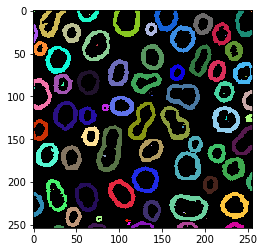

In [9]:
w.set("input", imread("C:/structure/data/blobs_edges.tif"))
result = w.get("segmented")

cle.imshow(result, labels=True)